## Dragon real state price predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("C:\\Users\\rambh\\OneDrive\\Desktop\\ml p1\\house_data(1).csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,NaN,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       500 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing["CHAS"].value_counts()

CHAS
0    470
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,500.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620625,11.386139,11.144832,0.069307,0.554865,6.281562,68.554455,3.792722,9.564356,408.566337,18.456832,356.594376,12.660020,22.534653
std,8.608589,23.340080,6.864761,0.254227,0.115930,0.704250,28.173012,2.107150,8.709391,168.541326,2.166895,91.367787,7.146426,9.206130
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.883000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,6.930000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.205000,77.300000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.618250,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# %matpotlib inline

In [8]:
# for plotting histograme
# import matplotlib.pyplot as plt
# housing.hist(bins =50, figsize=(20, 15))
# plt.show()

## Train Test Splitting

In [9]:
import numpy as np
# for learning perpose
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffered = np.random.permutation(len(data))
    print(shuffered)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffered[:test_set_size]
    train_indices = shuffered[test_set_size:]
    return data.iloc[train_indices] , data.iloc[test_indices]

In [10]:
# train_set , test_set = split_train_test(housing , 0.2)

In [11]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n" )

In [12]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing , test_size =0.2 , random_state = 42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n" )

Rows in train set: 404
Rows in test set: 101



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing , housing["CHAS"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set["CHAS"].value_counts()

CHAS
0    94
1     7
Name: count, dtype: int64

In [15]:
# 94/7


In [16]:
strat_train_set["CHAS"].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [17]:
# 376/28

In [18]:
housing = strat_train_set.copy()

## looking for correlations

In [19]:
corr_matrix = housing.corr()

In [20]:
corr_matrix["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.658836
B          0.344895
ZN         0.329297
DIS        0.231936
CHAS       0.214858
RAD       -0.363134
AGE       -0.378935
CRIM      -0.398268
NOX       -0.422316
TAX       -0.442413
INDUS     -0.448252
PTRATIO   -0.485465
LSTAT     -0.738849
Name: MEDV, dtype: float64

array([[<Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>,
        <Axes: xlabel='MEDV', ylabel='RM'>],
       [<Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>,
        <Axes: xlabel='MEDV', ylabel='ZN'>],
       [<Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>,
        <Axes: xlabel='MEDV', ylabel='LSTAT'>],
       [<Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>,
        <Axes: xlabel='MEDV', ylabel='MEDV'>]], dtype=object)

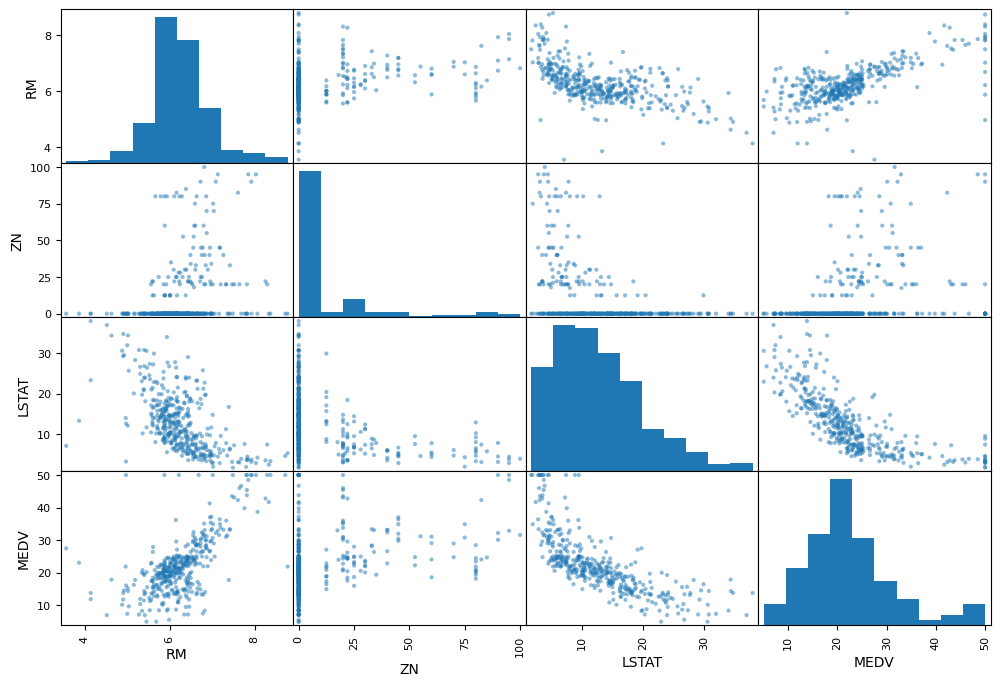

In [21]:
from pandas.plotting import scatter_matrix
attributes = ["RM" , "ZN" , "LSTAT" , "MEDV"]
scatter_matrix(housing[attributes] , figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

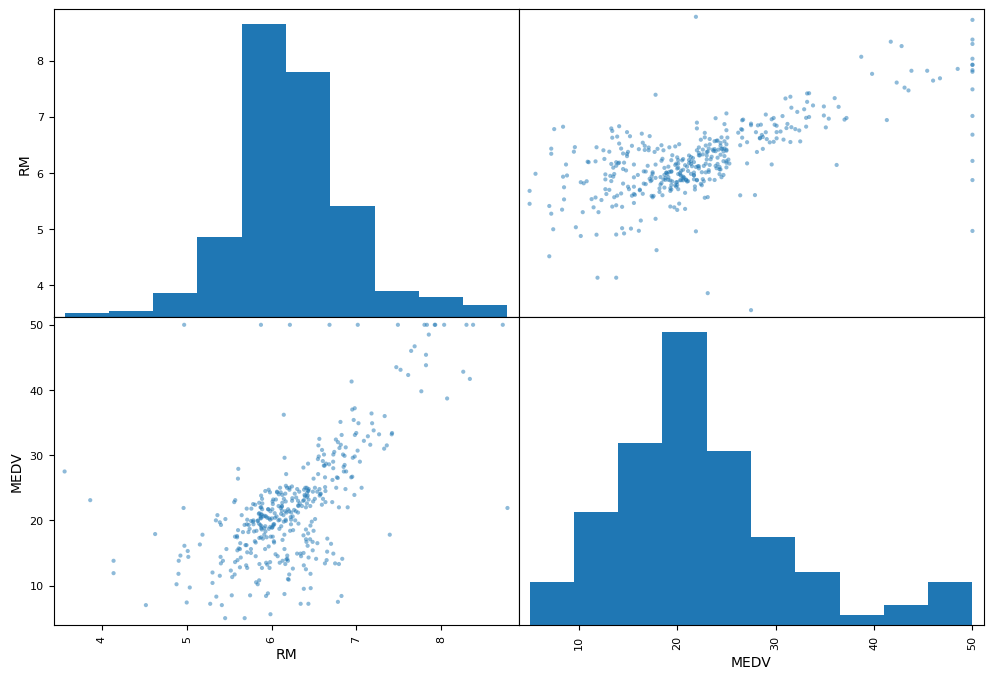

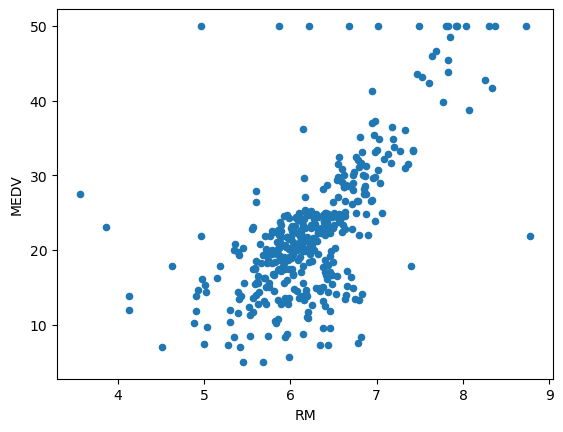

In [22]:
from pandas.plotting import scatter_matrix
attributes = ["RM" , "MEDV"]
scatter_matrix(housing[attributes] , figsize = (12,8))
housing.plot(kind = "scatter" , x ="RM" , y="MEDV")

## trying or Attribute combination

In [23]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]

In [24]:
housing["TAXRM"]

254     53.607897
348     48.277850
476    125.565611
321     47.508691
326     47.180667
          ...    
154     65.507152
423    119.676550
98      37.216828
455    111.445783
215     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [25]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,395.18,9.25,20.9,53.607897
348,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6,48.277850
476,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0,125.565611
321,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,5,287,19.6,396.90,7.70,20.4,47.508691
326,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,22.2,47.180667


In [26]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.658836
B          0.344895
ZN         0.329297
DIS        0.231936
CHAS       0.214858
RAD       -0.363134
AGE       -0.378935
CRIM      -0.398268
NOX       -0.422316
TAX       -0.442413
INDUS     -0.448252
PTRATIO   -0.485465
TAXRM     -0.504090
LSTAT     -0.738849
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

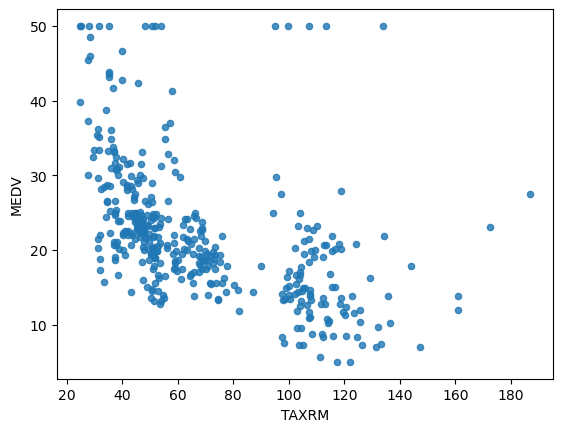

In [27]:
housing.plot(kind = "scatter" , x ="TAXRM" , y ="MEDV" , alpha = 0.8)

In [28]:
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         4
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
TAXRM      4
dtype: int64

In [29]:
housing = strat_train_set.drop("MEDV" , axis =1)
housing_labels = strat_train_set["MEDV"].copy()

# missing attribute 


In [30]:
# to take care of missing attribute
#    1. get rid of the missing data points
#    2. get rid of the whole attribute
#    3. set the value to same value (0 , mean or median)

In [31]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 254 to 215
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       400 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 44.2 KB


In [32]:
a = housing.dropna(subset = ["RM"])  #option 2
a.shape

(400, 13)

In [33]:
housing.drop(["RM" ] , axis =1).shape #option 2 rm column is not found

(404, 12)

In [34]:
median = housing[["RM" ]].median()

In [35]:
housing[["RM" ]].fillna(median)

,RM
254,5.876
348,6.939
476,5.304
321,6.041
326,6.083
...,...
154,6.152
423,5.565
98,7.416
455,5.976


In [36]:
housing.shape

(404, 13)

In [37]:
housing.describe()  # before we started imputing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680681,10.233911,11.294183,0.069307,0.557445,6.247382,68.514109,3.776377,9.700495,411.561881,18.496535,353.522649,12.822995
std,8.249728,21.928354,6.829140,0.254290,0.116424,0.689090,28.428821,2.125189,8.756814,168.123946,2.123142,95.111003,7.207684
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.873500,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.320000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.175000,77.150000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,12.500000,18.100000,0.000000,0.625750,6.593500,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [39]:
imputer.statistics_

array([2.9025e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.1750e+00, 7.7150e+01, 3.1675e+00, 5.0000e+00, 3.3600e+02,
       1.9050e+01, 3.9094e+02, 1.1570e+01])

In [40]:
x = imputer.transform(housing)

In [41]:
housing_tr = pd.DataFrame(x , columns = housing.columns)

In [42]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680681,10.233911,11.294183,0.069307,0.557445,6.246666,68.514109,3.776377,9.700495,411.561881,18.496535,353.522649,12.822995
std,8.249728,21.928354,6.829140,0.254290,0.116424,0.685699,28.428821,2.125189,8.756814,168.123946,2.123142,95.111003,7.207684
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.874750,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.320000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.175000,77.150000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,12.500000,18.100000,0.000000,0.625750,6.582500,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## scikit-learn design

primarily three types of objects
1. estmators = estimate such parameter
2. trannsformers
3. predictors

## creating pipeline

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('std_scaler', StandardScaler())
])


In [44]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [45]:
housing_num_tr.shape

(404, 13)

## selecting a desired model for Dragon real estate

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr , housing_labels)

RandomForestRegressor()

In [47]:
some_data = housing.iloc[:5]

In [48]:
some_labels = housing_labels.iloc[:5]

In [49]:

prepared_data = my_pipeline.transform(some_data)


In [50]:
model.predict(prepared_data)

array([20.645, 27.385, 12.977, 20.818, 21.798])

In [51]:
list(some_labels)

[20.9, 26.6, 12.0, 20.4, 22.2]

## evaluation the model

In [53]:
from  sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels , housing_predictions)
rmse = np.sqrt(mse)

In [54]:
rmse

1.1850429954183521

## using better evaluation technique =- Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr , housing_labels , scoring= "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [56]:
rmse_scores

array([3.36049061, 2.56193292, 5.21430627, 2.91012202, 2.82067994,
       2.41912606, 2.92476531, 2.86650233, 2.06704126, 4.00704315])

In [57]:
def print_scores(scores):
    print("Scores:" , scores)
    print("Mean:" , scores.mean())
    print("standard deviation:" , scores.std())

In [58]:
print_scores(rmse_scores)

Scores: [3.36049061 2.56193292 5.21430627 2.91012202 2.82067994 2.41912606
 2.92476531 2.86650233 2.06704126 4.00704315]
Mean: 3.1152009876795286
standard deviation: 0.8589513330684128


In [59]:
# convert the notebook  into a python file and trun the pipeline using visual stdio code

In [60]:
from joblib import dump, load

# Save your model
dump(model, "Dragon.joblib")


['Dragon.joblib']